# Household Power Consumption Dataset

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years. The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute. It is a multivariate series comprised of seven variables (besides the date and time); they are:

- **global active power**: The total active power consumed by the household (kilowatts).

- **global reactive power**: The total reactive power consumed by the household (kilowatts). 

- **voltage**: Average voltage (volts).

- **global intensity**: Average current intensity (amps).

- **sub metering 1**: Active energy for kitchen (watt-hours of active energy).

- **sub metering 2**: Active energy for laundry (watt-hours of active energy).

- **sub metering 3**: Active energy for climate control systems (watt-hours of active energy).

**Active** and **reactive** energy refer to the technical details of alternative current. 

In general terms, the active energy is the real power consumed by the household, whereas the reactive energy is the unused power in the lines. We can see that the dataset provides the active power as well as some division of the active power by main circuit in the house, specifically the kitchen, laundry, and climate control. These are not all the circuits in the household. The remaining watt-hours can be calculated from the active energy by first converting the active energy to watt-hours then subtracting the other sub-metered active energy in watt-hours, as follows:

remainder = (global_active_power * 1000) / 60 - (sub_metering_1 + sub_metering_2 + sub_metering_3)

The data were downloaded from https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption. 


## To work with a small dataset, the original data have been cleaned and resampled to 1-day cadence, where the power consumption was summed for each day. This file is named "household_power_consumption_daily.csv". 

### We will only take the following columns: 

- **global active power**: The total active power consumed by the household (kilowatts).

- **sub metering 1**: Active energy for kitchen (watt-hours of active energy).

- **sub metering 2**: Active energy for laundry (watt-hours of active energy).

- **sub metering 3**: Active energy for climate control systems (watt-hours of active energy).

- **sub metering 4**: Active energy for the remaining watt-hours not included in other sub metering (see above). \

# Tasks 

### 1. Explore the dataset 
    - see example in "00_Data_exploration_climate_time-series.ipynb" 

### 2. Formulate the problem
    For example, 
    
    - Based on the power consumption (global active power) of last month, predict the power consumption for next week using an autoregressive model. Here, predict "global active power". See example in "02_Univariate_Autoregressive-forecasting_LSTM_temperature.ipynb". 
    
    - Based on the sub_metering_1, sub_metering_2, sub_metering_3, sub_metering_4, model "global active power" in real time (using DNN model), or predict it for next week using the data of last month. See example in "01a_Multivariate_LSTM_magnetic-prediction.ipynb". 
    
### 3. Design a model, train it, and then test 

In [1]:
# import necessary modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration

In [2]:
# load the data, take only certain columns 
df = pd.read_csv('Data/household_power_consumption_daily.csv', usecols=['datetime', 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4'])

# make the datetime column as index 
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['datetime'])

df

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,
2006-12-16,1209.176,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,0.0,2648.0,14063.0,20384.800011
...,...,...,...,...,...
2010-11-22,2041.536,4855.0,2110.0,10136.0,16924.600023
2010-11-23,1577.536,1871.0,458.0,7611.0,16352.266679
2010-11-24,1796.248,1096.0,2848.0,12224.0,13769.466664


## Visualise the data 

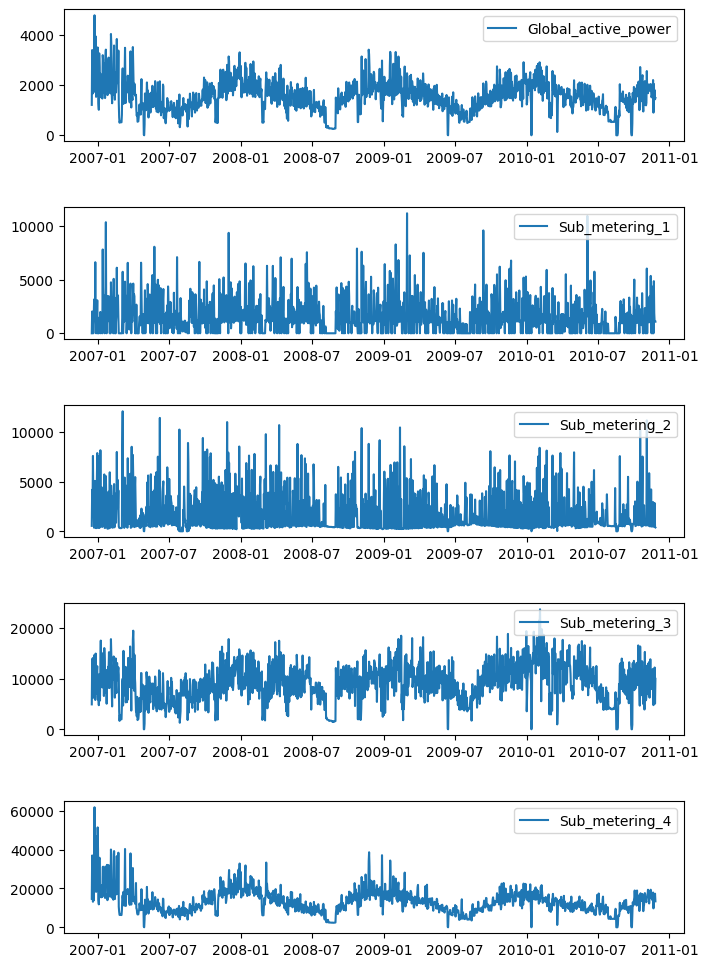

In [3]:
cols = df.columns

fig, ax = plt.subplots(len(cols), 1, figsize=(8,12))
plt.subplots_adjust(hspace=0.5)

i = 0
for col in cols:
    if i < len(cols):
        ax[i].plot(df[col], label=col)
        ax[i].legend(loc='upper right',bbox_to_anchor=(1.0, 1.0))
        i += 1 
        
plt.show()